In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset=pd.read_csv("/content/drive/My Drive/DoAnMachineLeaning/full_dataset_v2.csv",delimiter=";")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52005 entries, 0 to 52004
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     52005 non-null  object
 1   id_stack  52005 non-null  int64 
 2   tags      52005 non-null  object
 3   views     52005 non-null  int64 
 4   score     52005 non-null  int64 
 5   done      52005 non-null  bool  
 6   label     52005 non-null  object
dtypes: bool(1), int64(3), object(3)
memory usage: 2.4+ MB
None


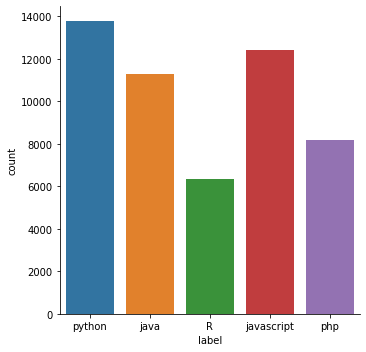

In [3]:
sns.catplot(x="label",kind="count",data=dataset)
plt.show()

In [4]:
X=dataset.iloc[:,0]
Y1=dataset.iloc[:,-1]
Y2=dataset.iloc[:,4]

In [5]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for review in X:
    review=re.sub("[^a-zA-z]"," ",review)
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review
if word not in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
cv=CountVectorizer()
X=cv.fit_transform(corpus)
print(X.shape[1])

17880


In [7]:
cv=CountVectorizer(max_features=17000)
cv_fit=cv.fit(corpus)
X=cv_fit.transform(corpus)
print(X.shape[1])

17000


In [13]:
print(corpus)

  (0, 2340)	1
  (0, 4416)	1
  (0, 7984)	1
  (0, 15848)	1
  (1, 3765)	1
  (1, 10225)	1
  (1, 11372)	1
  (1, 11436)	1
  (1, 13598)	1
  (2, 4730)	1
  (2, 12001)	1
  (2, 14164)	1
  (2, 14980)	1
  (3, 285)	1
  (3, 5264)	1
  (3, 5286)	1
  (3, 6363)	1
  (3, 6569)	1
  (3, 9258)	1
  (3, 13726)	1
  (4, 1316)	1
  (4, 1326)	1
  (4, 2605)	1
  (4, 2621)	1
  (4, 3456)	1
  :	:
  (52001, 1724)	1
  (52001, 2383)	1
  (52001, 3428)	1
  (52001, 6569)	1
  (52001, 10068)	1
  (52001, 15848)	1
  (52002, 4649)	1
  (52002, 4750)	1
  (52002, 5675)	1
  (52002, 6785)	1
  (52002, 9591)	1
  (52002, 9820)	1
  (52002, 10004)	1
  (52002, 11152)	1
  (52002, 15288)	1
  (52002, 16104)	1
  (52003, 3850)	1
  (52003, 5937)	1
  (52003, 7119)	1
  (52003, 10522)	1
  (52003, 16121)	1
  (52004, 3129)	1
  (52004, 3329)	1
  (52004, 16477)	1
  (52004, 16590)	1


In [9]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =train_test_split(X,Y1,train_size=0.8,random_state=0)
x_train2,x_test2,y_train2,y_test2 =train_test_split(X,Y2,train_size=0.8,random_state=0)

0.7952119988462648


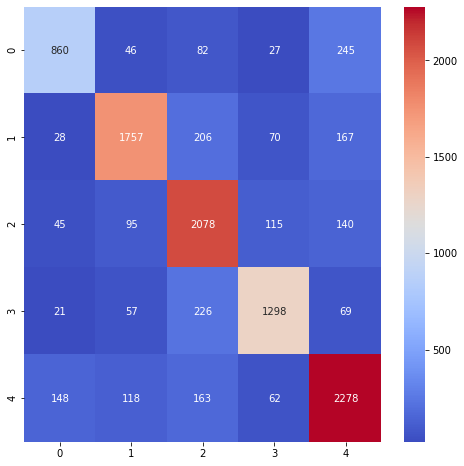

In [10]:
from sklearn.naive_bayes import  MultinomialNB
model=MultinomialNB()
model.fit(x_train1,y_train1)
y_pred1=model.predict(x_test1)
score=accuracy_score(y_test1,y_pred1)
print(score)
cm =confusion_matrix(y_test1,y_pred1)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True,ax = ax,fmt='g',cmap='coolwarm')
plt.show()

In [ ]:
joblib.dump(model,"/content/drive/My Drive/DoAnMachineLeaning/MulNB.h5")
joblib.dump(cv_fit,"/content/drive/My Drive/DoAnMachineLeaning/CountVector.h5")

['/content/drive/My Drive/DoAnMachineLeaning/CountVector.h5']

0.7027208922219017


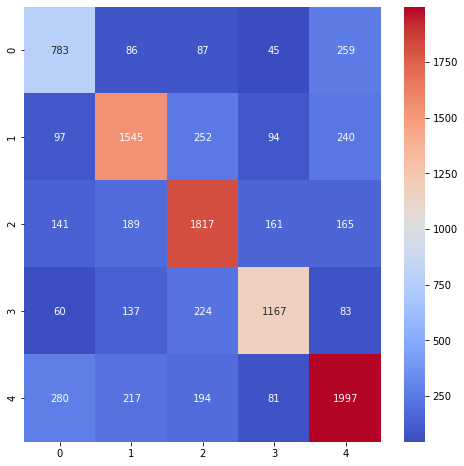

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion = "entropy",random_state=0)
model.fit(x_train1,y_train1)
y_pred1=model.predict(x_test1)
score=accuracy_score(y_test1,y_pred1)
print(score)
cm =confusion_matrix(y_test1,y_pred1)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True,ax = ax,fmt='g',cmap='coolwarm')
plt.show()

In [ ]:
joblib.dump(model,"/content/drive/My Drive/DoAnMachineLeaning/CayQuyetDinh.h5")

['/content/drive/My Drive/DoAnMachineLeaning/CayQuyetDinh.h5']

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8030958561676762


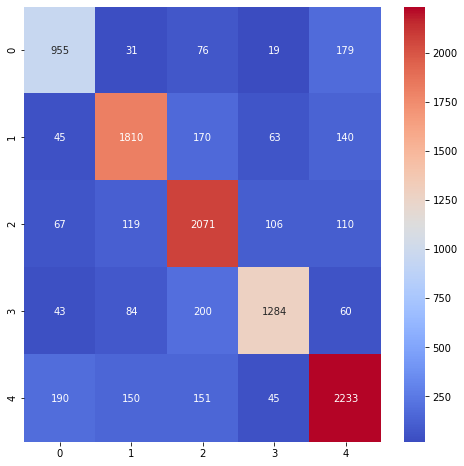

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train1,y_train1)
y_pred1=model.predict(x_test1)
score=accuracy_score(y_test1,y_pred1)
print(score)
cm =confusion_matrix(y_test1,y_pred1)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True,ax = ax,fmt='g',cmap='coolwarm')
plt.show()

In [27]:
data=dataset
data=data.iloc[:,0]
print(X)

0                    Using entries from other kivy classes
1         Package python software with pylucene dependency
2                 Extracting time with regex from a string
3        How do I add specific headers before each form...
4        Barplot from a dataframe using a column to set...
                               ...                        
52000        return not working on JS but console.log does
52001    How to clear data of AutoComplete Box using On...
52002    Facade\Ignition\Exceptions\ViewException Tryin...
52003               Install git on vim for php development
52004                  Creating custom widget in wordpress
Name: title, Length: 52005, dtype: object


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(data)
Y=dataset.iloc[:,4]
x_train2,x_test2,y_train2,y_test2 =train_test_split(X,Y,train_size=0.8,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train2,y_train2)
from sklearn.metrics import r2_score
score=r2_score(y_test2,model.predict(x_test2))
print(score)

-0.40894478301327997


In [30]:
from sklearn.svm import SVR
model = SVR(kernel = "rbf")
model.fit(x_train2,y_train2)
from sklearn.metrics import r2_score
score=r2_score(y_test2,model.predict(x_test2))
print(score)

-0.007459702700515436
